In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('income.csv')
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


## Describing data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
data.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

Currently the data read from 'income.csv' file shows that there are no null values present<br>
There are total 12 columns, and 31978 instances<br>
There are 9 columns with text values and 4 columns with integer values<br>
There are no null values present in the data

In [5]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [6]:
data.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


.describe() method gives the description of only numerical values by default<br>
The table displayed above is self explainatory<br>

## Correlation Analysis

In [7]:
data.corr(numeric_only=True)

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


As of now there is no high correlation between any variables

## Data Cleaning

In [8]:
data.JobType.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [9]:
data.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

By looking to these data we can see that there is one invalid value present i.e., "?"<br>
We read the csv file again with the na_values parameter set to ["?"] so that we can fill those values and use for training instead of deleting the entire row or column

In [10]:
data=pd.read_csv('income.csv', na_values=[' ?'])

## Describing Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [12]:
data.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

We can see that the columns "JobType" and "occupation" has some null values

## Data Cleaning

First we will fill the **null** values

We convert all the text values containing columns to integer values by using **LableEncoder**<br>
<br>
Columns to be converted:
- JobType
- EdType
- maritalstatus
- occupation
- relationship
- race
- gender
- nativecountry
- SalStat

In [13]:
data.JobType.fillna(data.JobType.mode()[0], inplace=True)
data.occupation.fillna(data.occupation.mode()[0], inplace=True)

We fill the null values with the mode of the respective columns

In [14]:
data.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

Now the data does not contain any null vallues

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()
data.JobType=encoder.fit_transform(data.JobType)
data.EdType=encoder.fit_transform(data.EdType)
data.maritalstatus=encoder.fit_transform(data.maritalstatus)
data.occupation=encoder.fit_transform(data.occupation)
data.relationship=encoder.fit_transform(data.relationship)
data.race=encoder.fit_transform(data.race)
data.gender=encoder.fit_transform(data.gender)
data.nativecountry=encoder.fit_transform(data.nativecountry)
data.SalStat=encoder.fit_transform(data.SalStat)

In [17]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,3,11,0,0,1,4,0,0,0,28,38,1
1,24,0,11,4,1,3,4,1,0,0,40,38,1
2,44,3,15,2,9,0,4,1,0,0,40,38,0
3,27,3,6,4,2,2,4,1,0,0,40,25,1
4,20,3,15,4,11,1,4,1,0,0,35,38,1


We remove duplicate rows

In [18]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28462 entries, 0 to 31976
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            28462 non-null  int64
 1   JobType        28462 non-null  int32
 2   EdType         28462 non-null  int32
 3   maritalstatus  28462 non-null  int32
 4   occupation     28462 non-null  int32
 5   relationship   28462 non-null  int32
 6   race           28462 non-null  int32
 7   gender         28462 non-null  int32
 8   capitalgain    28462 non-null  int64
 9   capitalloss    28462 non-null  int64
 10  hoursperweek   28462 non-null  int64
 11  nativecountry  28462 non-null  int32
 12  SalStat        28462 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.1 MB


## Correlation Analysis

In [19]:
data.corr()['SalStat']

age             -0.213759
JobType         -0.001524
EdType          -0.093147
maritalstatus    0.188266
occupation      -0.036576
relationship     0.245484
race            -0.081111
gender          -0.217114
capitalgain     -0.230217
capitalloss     -0.152053
hoursperweek    -0.226957
nativecountry   -0.028632
SalStat          1.000000
Name: SalStat, dtype: float64

We can see that from the above values<br>
The columns: **'age', 'maritalstatus', 'relationship', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek'**<br>
have more impact on the target column comapareed to other columns

## Feature Scaling

In [20]:
data.describe()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,39.279636,3.102031,10.209894,2.588223,6.214953,1.472279,3.639941,0.660143,1187.479903,96.917293,40.628522,36.196227,0.751985
std,13.705982,1.161583,3.916794,1.540272,3.971929,1.623884,0.877319,0.473669,7700.763894,423.344854,12.743076,6.438333,0.431868
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,1.000000
50%,38.000000,3.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,1.000000
75%,48.000000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,1.000000
max,90.000000,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


The values of the columns *capitalgain* and *capitalloss* contained large numbers so we perform feature scaling using **MinMaxScaler**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()
data.capitalgain=scaler.fit_transform(data[['capitalgain']])
data.capitalloss=scaler.fit_transform(data[['capitalloss']])

In [23]:
data.describe()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,39.279636,3.102031,10.209894,2.588223,6.214953,1.472279,3.639941,0.660143,0.011875,0.022249,40.628522,36.196227,0.751985
std,13.705982,1.161583,3.916794,1.540272,3.971929,1.623884,0.877319,0.473669,0.077008,0.097187,12.743076,6.438333,0.431868
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,1.000000
50%,38.000000,3.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,1.000000
75%,48.000000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,1.000000
max,90.000000,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.000000,1.000000,99.000000,40.000000,1.000000


In [24]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,3,11,0,0,1,4,0,0.0,0.0,28,38,1
1,24,0,11,4,1,3,4,1,0.0,0.0,40,38,1
2,44,3,15,2,9,0,4,1,0.0,0.0,40,38,0
3,27,3,6,4,2,2,4,1,0.0,0.0,40,25,1
4,20,3,15,4,11,1,4,1,0.0,0.0,35,38,1


## Training with *Logistic Regression* Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
model1=LogisticRegression(solver='liblinear')

In [27]:
x=data.drop(['SalStat'], axis=1)
y=data['SalStat']

In [28]:
x.shape, y.shape

((28462, 12), (28462,))

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
model1.fit(x_train ,y_train)

LogisticRegression(solver='liblinear')

In [31]:
y_pred=model1.predict(x_test)

## Evaluation for Logistic Regression

In [32]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_recall_curve, roc_curve

In [33]:
# Accuracy
logistic_regression_accuracy_score=accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic Regression Model:", logistic_regression_accuracy_score)

Accuracy Score for Logistic Regression Model: 0.8027402072720885


In [34]:
# Precision, Recall, Fscore
log_precision, log_recall, log_fscore, log_support=precision_recall_fscore_support(y_test, y_pred)
print("Precision value for Logistic Regression:", log_precision[0])
print("Recall value for Logistic Regression:", log_recall[0])
print("FScore value for Logistic Regression:", log_fscore[0])

Precision value for Logistic Regression: 0.7101910828025477
Recall value for Logistic Regression: 0.32155731795241527
FScore value for Logistic Regression: 0.4426799007444169


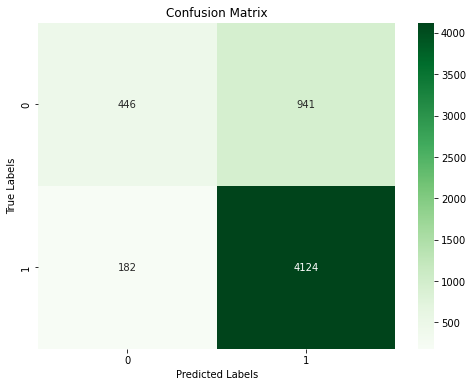

In [35]:
# Confusion Matrix
log_cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(log_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [36]:
log_prob_test=model1.predict_proba(x_test)[:,1]
log_prob_train=model1.predict_proba(x_train)[:,1]

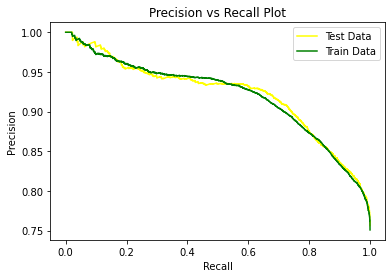

In [37]:
log_precision_test, log_recall_test , t= precision_recall_curve(y_test, log_prob_test)
log_precision_train, log_recall_train, t=precision_recall_curve(y_train, log_prob_train)
plt.plot(log_recall_test, log_precision_test, color='yellow')
plt.plot(log_recall_train, log_precision_train, color='green')
plt.legend(['Test Data', 'Train Data'])
plt.title("Precision vs Recall Plot")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

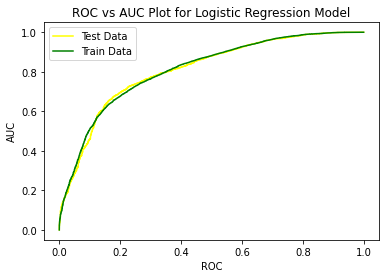

In [38]:
log_fpr_test, log_tpr_test, t = roc_curve(y_test, log_prob_test)
log_fpr_train, log_tpr_train, t = roc_curve(y_train, log_prob_train)
plt.plot(log_fpr_test, log_tpr_test, color='yellow')
plt.plot(log_fpr_train, log_tpr_train, color='green')
plt.legend(['Test Data', 'Train Data'])
plt.title("ROC vs AUC Plot for Logistic Regression Model")
plt.xlabel("ROC")
plt.ylabel("AUC")
plt.show()

## Cross Validation for Logistic Regression

In [39]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1, x_train, y_train, cv=5)
print("Cross Validation Scores:", scores)
log_best_score=max(scores)
print("Best Cross Validation Score for Logistic Regression:", log_best_score)

Cross Validation Scores: [0.79885815 0.80193237 0.79490558 0.79578393 0.79639798]
Best Cross Validation Score for Logistic Regression: 0.8019323671497585


## Fine Tuning Logistic Regression Model
### GridSearchCV

With parameters:
- solver : ['liblinear', 'saga', 'lbfgs']<br>
- C : [1, 10, 20, 100]

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {'solver':['liblinear', 'lbfgs'], 'C':[1, 10, 20, 100], 'max_iter':[300, 900, 1000]}
grid_cv=GridSearchCV(model1, params, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)

C:\Users\Jayanth M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jayanth M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

C:\Users\Jayanth M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jayanth M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 20, 100], 'max_iter': [300, 900, 1000],
                         'solver': ['liblinear', 'lbfgs']})

In [42]:
grid_res=pd.DataFrame(grid_cv.cv_results_)
grid_res[['param_C', 'param_solver', 'mean_test_score']]

,param_C,param_solver,mean_test_score
0,1,liblinear,0.797576
1,1,lbfgs,0.788660
2,1,liblinear,0.797576
3,1,lbfgs,0.798190
4,1,liblinear,0.797576
5,1,lbfgs,0.798190
6,10,liblinear,0.799596
7,10,lbfgs,0.790944
8,10,liblinear,0.799596
9,10,lbfgs,0.799728


In [43]:
print("Best Estimators:", grid_cv.best_estimator_)
print("Best Parameters:", grid_cv.best_params_)
print("Best Score:", grid_cv.best_score_)

Best Estimators: LogisticRegression(C=10, max_iter=900)
Best Parameters: {'C': 10, 'max_iter': 900, 'solver': 'lbfgs'}
Best Score: 0.7997276308767061


### RandamizedSearch CV

With parameters:
- solver : ['liblinear', 'saga']<br>
- C : [1, 10, 20, 100]

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
rand_cv=RandomizedSearchCV(model1, params, cv=5, n_iter=5, return_train_score=False)
rand_cv.fit(x_train, y_train)

C:\Users\Jayanth M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jayanth M V\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=5,
                   param_distributions={'C': [1, 10, 20, 100],
                                        'max_iter': [300, 900, 1000],
                                        'solver': ['liblinear', 'lbfgs']})

In [46]:
rand_res=pd.DataFrame(rand_cv.cv_results_)
rand_res[['param_C', 'param_solver', 'mean_test_score']]

,param_C,param_solver,mean_test_score
0,20,lbfgs,0.790461
1,1,liblinear,0.797576
2,10,lbfgs,0.790944
3,20,liblinear,0.799464
4,20,liblinear,0.799464


In [47]:
print("Best Estimators:", rand_cv.best_estimator_)
print("Best Parameters:", rand_cv.best_params_)
print("Best Score:", rand_cv.best_score_)

Best Estimators: LogisticRegression(C=20, max_iter=1000, solver='liblinear')
Best Parameters: {'solver': 'liblinear', 'max_iter': 1000, 'C': 20}
Best Score: 0.7994641359111989


## Training with *Random Forest* Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [50]:
model2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [51]:
y_pred=model2.predict(x_test)

## Evaluation for Random Forest Classifier Model

In [52]:
# Accuracy
rf_accuracy_score=accuracy_score(y_test, y_pred)
print("Accuracy Score for Random Forest Classfier:", rf_accuracy_score)

Accuracy Score for Random Forest Classfier: 0.829264008431407


In [53]:
# Precision, Recall, Fscore
rf_precision, rf_recall, rf_fscore, rf_support=precision_recall_fscore_support(y_test, y_pred)
print("Precision value for Logistic Regression:", log_precision[0])
print("Recall value for Random Forest Classfier:", log_recall[0])
print("FScore value for Random Forest Classfier:", log_fscore[0])

Precision value for Logistic Regression: 0.7101910828025477
Recall value for Random Forest Classfier: 0.32155731795241527
FScore value for Random Forest Classfier: 0.4426799007444169


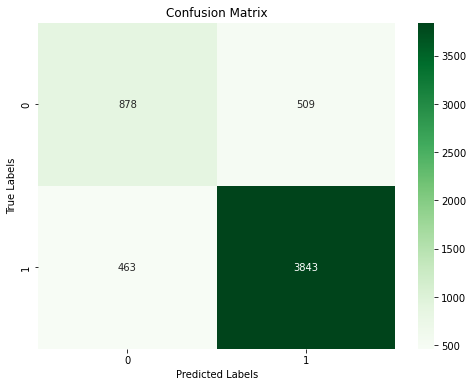

In [70]:
# Confusion Matrix
rf_cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [55]:
rf_prob_test=model2.predict_proba(x_test)[:,1]
rf_prob_train=model2.predict_proba(x_train)[:,1]

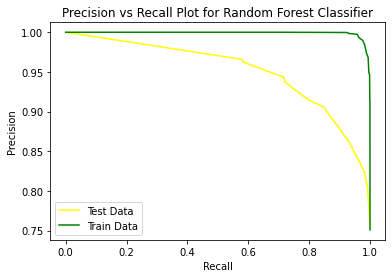

In [56]:
rf_precision_test, rf_recall_test , t= precision_recall_curve(y_test, rf_prob_test)
rf_precision_train, rf_recall_train, t=precision_recall_curve(y_train, rf_prob_train)
plt.plot(rf_recall_test, rf_precision_test, color='yellow')
plt.plot(rf_recall_train, rf_precision_train, color='green')
plt.legend(['Test Data', 'Train Data'])
plt.title("Precision vs Recall Plot for Random Forest Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

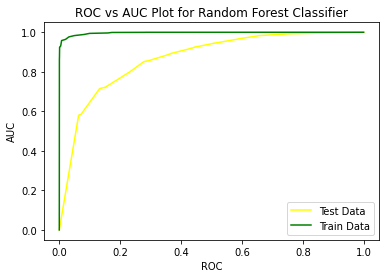

In [57]:
rf_fpr_test, rf_tpr_test, t = roc_curve(y_test, rf_prob_test)
rf_fpr_train, rf_tpr_train, t = roc_curve(y_train, rf_prob_train)
plt.plot(rf_fpr_test, rf_tpr_test, color='yellow')
plt.plot(rf_fpr_train, rf_tpr_train, color='green')
plt.legend(['Test Data', 'Train Data'])
plt.title("ROC vs AUC Plot for Random Forest Classifier")
plt.xlabel("ROC")
plt.ylabel("AUC")
plt.show()

In [58]:
scores=cross_val_score(model2, x_train, y_train, cv=5)
print("Cross Validation Scores:", scores)
rf_best_score=max(scores)
print("Best Cross Validation Score for Random Forest Classfier:", rf_best_score)

Cross Validation Scores: [0.82125604 0.83025911 0.82147563 0.82938076 0.82912365]
Best Cross Validation Score for Random Forest Classfier: 0.8302591128678085


## Fine Tuninig Random Forest Classifier
### GridSearchCV

With parameters :<br>
- n_estimators : [200, 700],
- max_features : ['sqrt', 'log2']

In [59]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['sqrt', 'log2']
}

In [60]:
CV_rfc = GridSearchCV(estimator=model2, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [61]:
rf_grid_res=pd.DataFrame(CV_rfc.cv_results_)
rf_grid_res[['param_n_estimators', 'param_max_features', 'mean_test_score']]

,param_n_estimators,param_max_features,mean_test_score
0,200,sqrt,0.837059
1,700,sqrt,0.838377
2,200,log2,0.837059
3,700,log2,0.838377


In [62]:
print("Best Estimators:", CV_rfc.best_estimator_)
print("Best Parameters:", CV_rfc.best_params_)
print("Best Score:", CV_rfc.best_score_)

Best Estimators: RandomForestClassifier(criterion='entropy', n_estimators=700, random_state=0)
Best Parameters: {'max_features': 'sqrt', 'n_estimators': 700}
Best Score: 0.8383770670156139


## RandomizedSearchCV
With parameters<br>
- n_estimators : [200, 700],
- max_features : ['sqrt', 'log2']

In [63]:
rf_rand_cv=RandomizedSearchCV(model2, param_grid, cv=5, n_iter=4, return_train_score=False)
rf_rand_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=10,
                                                    random_state=0),
                   n_iter=4,
                   param_distributions={'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [200, 700]})

In [64]:
rf_rand_res=pd.DataFrame(rf_rand_cv.cv_results_)
rf_rand_res[['param_n_estimators', 'param_max_features', 'mean_test_score']]

,param_n_estimators,param_max_features,mean_test_score
0,200,sqrt,0.837059
1,700,sqrt,0.838377
2,200,log2,0.837059
3,700,log2,0.838377


In [65]:
print("Best Estimators:", rf_rand_cv.best_estimator_)
print("Best Parameters:", rf_rand_cv.best_params_,)
print("Best Score:", rf_rand_cv.best_score_)

Best Estimators: RandomForestClassifier(criterion='entropy', n_estimators=700, random_state=0)
Best Parameters: {'n_estimators': 700, 'max_features': 'sqrt'}
Best Score: 0.8383770670156139


## Visualizing the result by comparing Logistic Regression and Random Forest

In [66]:
print("Accuracy Score for Logistic Regression Model:", logistic_regression_accuracy_score)
print("Accuracy Score for Random Forest Classfier:", rf_accuracy_score)

Accuracy Score for Logistic Regression Model: 0.8027402072720885
Accuracy Score for Random Forest Classfier: 0.829264008431407


In [67]:
print("Best Cross Validation Score for Logistic Regression:", log_best_score)
print("Best Cross Validation Score for Random Forest Classfier:", rf_best_score)

Best Cross Validation Score for Logistic Regression: 0.8019323671497585
Best Cross Validation Score for Random Forest Classfier: 0.8302591128678085


Precision vs Recall comparisition for Logistic Regression and Random Forest Classifier

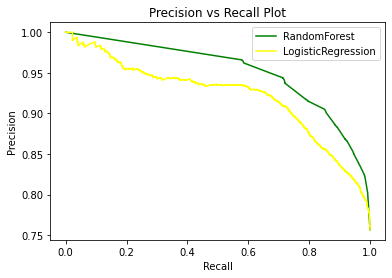

In [68]:
plt.plot(rf_recall_test, rf_precision_test, color='green')
plt.plot(log_recall_test, log_precision_test, color='yellow')
plt.title("Precision vs Recall Plot")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['RandomForest', 'LogisticRegression'])
plt.show()

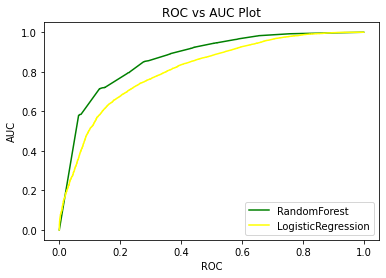

In [69]:
plt.plot(rf_fpr_test, rf_tpr_test, color='green')
plt.plot(log_fpr_train, log_tpr_train, color='yellow')
plt.legend(['RandomForest', 'LogisticRegression'])
plt.title("ROC vs AUC Plot")
plt.xlabel("ROC")
plt.ylabel("AUC")
plt.show()

From the above graphs we can conclude that ***Random Forest Classifier*** comparitively gives better result than Logistic Regression for this problem